There are four techniques to compute derivatives: hand-coded analytical derivative, finite differentiation, symbolic differentiation, and automatic differentiation [@margossian_review_2019]. In this post, I will demonstrate how to find the derivative of a simple 1D scalar function, $f(x) = x^2 + \sin(3x)$, using each of these four methods in Python within the interval $x \in [0, \pi]$.

## Hand-coded analytical derivative

You can find the analytical derivative of the fucntion $f(x) = x^2 + \sin(3x)$ using the [table of derivatives](https://openstax.org/books/calculus-volume-1/pages/b-table-of-derivatives) learned in your Calculus course.

$$
\begin{align*}
\frac{d}{dx} f(x) & = \frac{d}{dx} (x^2 + \sin(3x)) \\
& = \frac{d}{dx} x^2 + \frac{d}{dx} \sin(3x) \\
& = 2x + 3\cos(3x)
\end{align*}
$$

Thus, for every $x$,

$$
f'(x) = 2x + 3\cos(3x)
$$

According to the [previous post](https://mgjeon.github.io/posts/draw-1d-scalar-function/) where I explained how to draw a 1D scalar function in Python, I will plot $f(x)$ and its derivative $f'(x)$ using Matplotlib.

In [ ]:
#| code-fold: true
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "font.size": 15,
    "figure.figsize": (8, 6)
})

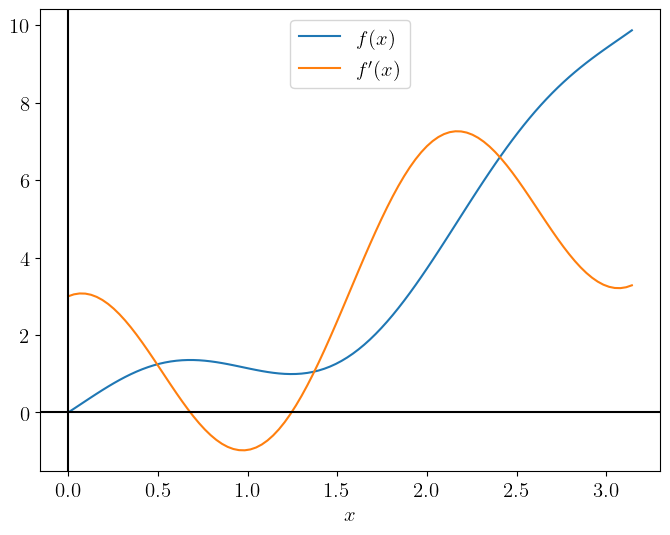

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda x: x**2 + np.sin(3*x)
d_func = lambda x: 2*x + 3*np.cos(3*x)

x = np.linspace(0, np.pi, 100)
f = func(x)
df_dx = d_func(x)

plt.plot(x, f, label=r"$f(x)$")
plt.plot(x, df_dx, label=r"$f'(x)$")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.legend()
plt.show()

## Finite differentiation

You can derive the following finite differentiation formulae using [Taylor's theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem). I will explain how to derive these formulae using [SymPy](https://www.sympy.org) in the another post.

### Finite differentiation formulae {#sec-formulae}
- Forward difference
    - 1st order accuracy
    $$
    f'(x) = \frac{f(x+h) - f(x)}{h} + \mathcal{O}(h)
    $$
    - 2nd order accuracy
    $$
    f'(x) = \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h} + \mathcal{O}(h^2)
    $$

- Backward difference
    - 1st order accuracy
    $$
    f'(x) = \frac{f(x) - f(x-h)}{h} + \mathcal{O}(h)
    $$
    - 2nd order accuracy
    $$
    f'(x) = \frac{3f(x) - 4f(x-h) + f(x-2h)}{2h} + \mathcal{O}(h^2)
    $$

- Central difference
    - 2nd order accuracy
    $$
    f'(x) = \frac{f(x+h) - f(x-h)}{2h} + \mathcal{O}(h^2)
    $$

### Implementation using `NumPy`

NumPy arrays make the implementation of finite differentitation very straightforward. It's important to note that at the left boundary ($x=0$), I use the forward difference, while at the right boundary ($x=\pi$), I use the backward difference. Within the domain ($0<x<\pi$), I use the central difference.

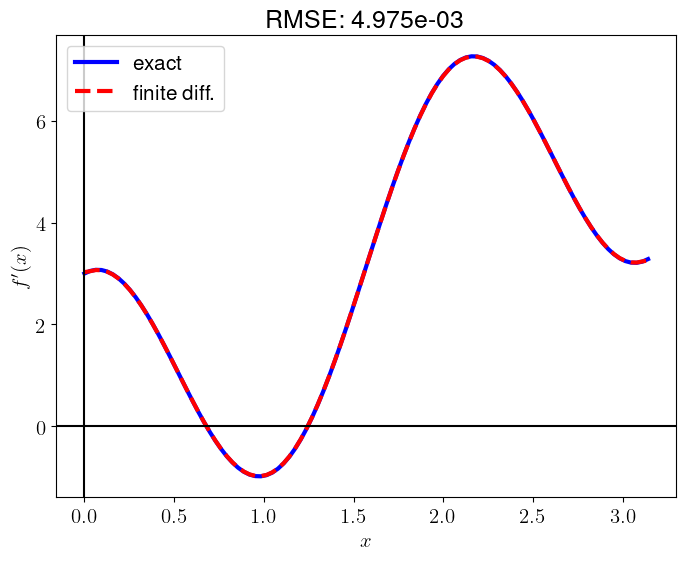

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

func = lambda x: x**2 + np.sin(3*x)

x = np.linspace(0, np.pi, 100)
f = func(x)

# calculate the spacing dx 
dx = x[1]-x[0]
# you can use np.diff
# dx = np.diff(x)[0] or
# dx = np.mean(np.diff(x))

# create an array with the same shape as `f`
df_dx = np.zeros_like(f)

# forward difference (1st order) at the left boundary
df_dx[0] = (f[1] - f[0]) / dx

# backward difference (1st order) at the right boundary
df_dx[-1] = (f[-1] - f[-2]) / dx

# central difference (2nd accuracy) within the domain
df_dx[1:-1] = (f[2:] - f[:-2]) / (2*dx)

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
df_dx_exact = exact_d_func(x)
plt.plot(x, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x, df_dx, 'r--', lw=3, label="finite diff.")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show()

In the case of using 1st order accuracy formulae, the errors at the boundaries are

In [ ]:
print('1st order')
print(f'dx   : {dx:.4f}')
print(f'left : {np.abs(df_dx[0] - df_dx_exact[0]):.4f}')
print(f'right: {np.abs(df_dx[-1] - df_dx_exact[-1]):.4f}')

1st order
dx   : 0.0317
left : 0.0272
right: 0.0272


If we use the 2nd order accuracy formulae at the boundaries instead, we get the following errors:

In [ ]:
# forward difference (2nd order) at the left boundary
df_dx[0] = (-3*f[0] + 4*f[1] - f[2]) / (2*dx)

# backward difference (2nd order) at the right boundary
df_dx[-1] = (3*f[-1] - 4*f[-2] + f[-3]) / (2*dx)

print('2nd order')
print(f'dx^2 : {dx**2:.4f}')
print(f'left : {np.abs(df_dx[0] - df_dx_exact[0]):.4f}')
print(f'right: {np.abs(df_dx[-1] - df_dx_exact[-1]):.4f}')

2nd order
dx^2 : 0.0010
left : 0.0090
right: 0.0090


In [ ]:
np.allclose(df_dx_exact, df_dx)

False

In [ ]:
np.allclose(df_dx_exact, df_dx, atol=1e-2)

True

### Implementation using `findiff`

There is a convenient library for finite differentiation in Python: [findiff](https://github.com/maroba/findiff)

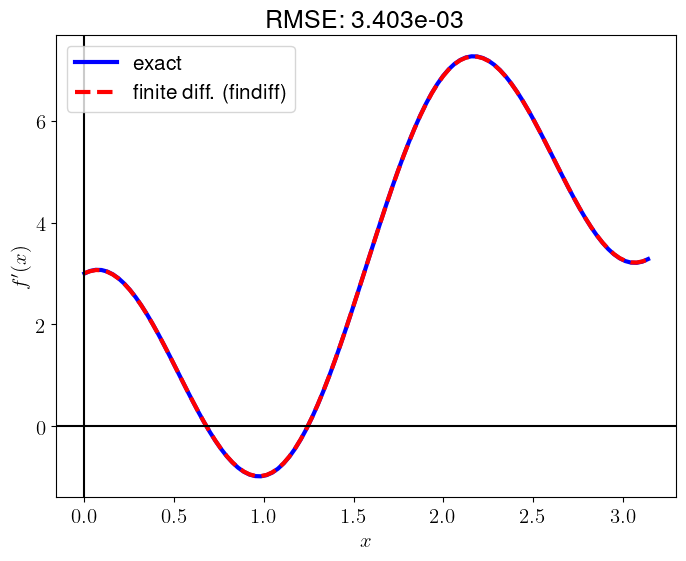

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from findiff import FinDiff

func = lambda x: x**2 + np.sin(3*x)

x = np.linspace(0, np.pi, 100)
f = func(x)

# calculate the spacing dx 
dx = x[1]-x[0]

# construct the differential operator: FinDiff(axis, spacing, degree)
d_dx = FinDiff(0, dx, 1) 

df_dx_findiff = d_dx(f)

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
df_dx_exact = exact_d_func(x)
plt.plot(x, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x, df_dx_findiff, 'r--', lw=3, label="finite diff. (findiff)")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx_findiff)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show()

By default, `findiff` uses 2nd order accuray.

In [ ]:
np.allclose(df_dx, df_dx_findiff)

True

You can also find finite difference coefficients using this library. (see @sec-formulae)

In [ ]:
import findiff
# coefficients of 2nd order accuracy formulae for 1st derivative
findiff.coefficients(deriv=1, acc=2)

{'center': {'coefficients': array([-0.5,  0. ,  0.5]),
  'offsets': array([-1,  0,  1]),
  'accuracy': 2},
 'forward': {'coefficients': array([-1.5,  2. , -0.5]),
  'offsets': array([0, 1, 2]),
  'accuracy': 2},
 'backward': {'coefficients': array([ 0.5, -2. ,  1.5]),
  'offsets': array([-2, -1,  0]),
  'accuracy': 2}}

In [ ]:
np.allclose(df_dx_exact, df_dx_findiff)

False

In [ ]:
np.allclose(df_dx_exact, df_dx_findiff, atol=1e-2)

True

### Implementation using `numdifftools`

There is another convenient library for automatic numerical differentiation in Python: [numdifftools](https://github.com/pbrod/numdifftools)

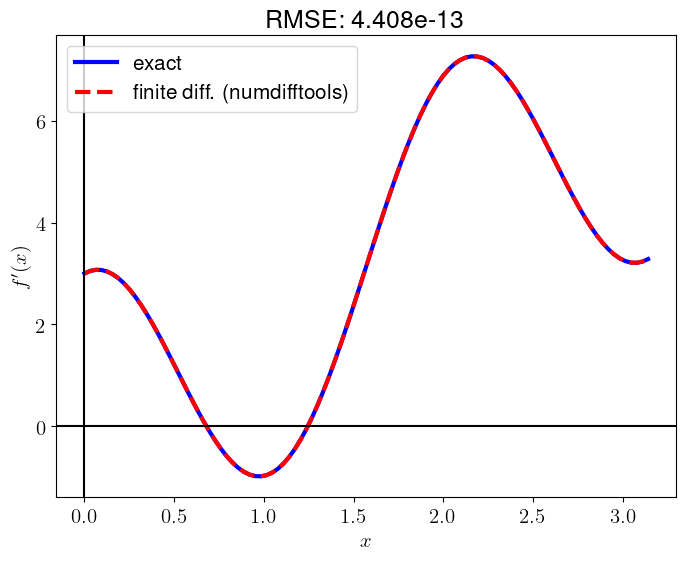

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nd

func = lambda x: x**2 + np.sin(3*x)

# construct a derivative function (FD)
d_func = nd.Derivative(func, n=1)

x = np.linspace(0, np.pi, 100)
df_dx_numdifftools = d_func(x)

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
df_dx_exact = exact_d_func(x)
plt.plot(x, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x, df_dx_numdifftools, 'r--', lw=3, label="finite diff. (numdifftools)")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx_numdifftools)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show()

Since this library uses an adaptive finite differences with a Richardson extrapolation methodology, the result is maximally accurate.

In [ ]:
np.allclose(df_dx_exact, df_dx_numdifftools)

True

## Symbolic differentiation
### Implementation using `Sympy`

By using `SymPy`, we can symbolically differentiate $f(x) = x^2 + \sin(3x)$

In [ ]:
from sympy import symbols, sin, diff
x = symbols('x')
f = x**2 + sin(3*x)
f

x**2 + sin(3*x)

In [ ]:
df_dx_sympy = diff(f, x)
df_dx_sympy

2*x + 3*cos(3*x)

As I mentioned in the [previous post](https://mgjeon.github.io/posts/draw-1d-scalar-function/), `SymPy` also supports plotting of a function.

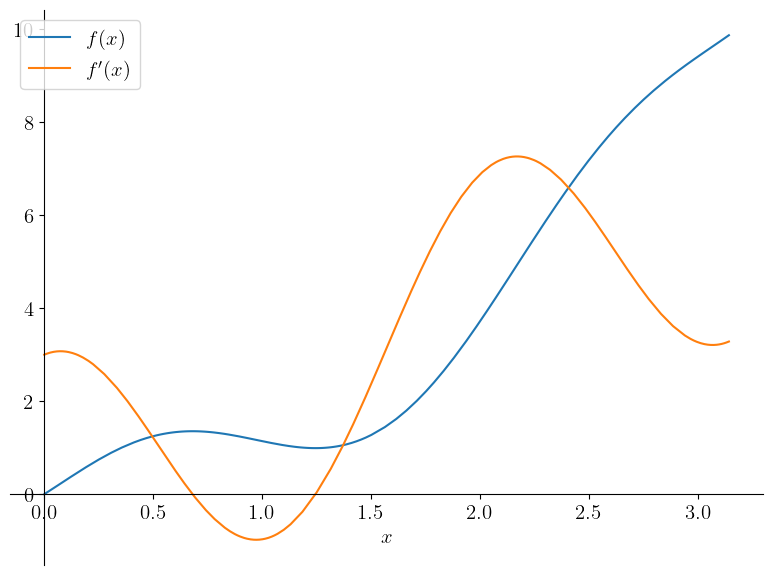

In [ ]:
from sympy.plotting import plot
p1 = plot(f, (x, 0, np.pi), legend=True, show=False, label="$f(x)$", ylabel='')
p2 = plot(df_dx_sympy, (x, 0, np.pi), legend=True, show=False, label=r"$f'(x)$", ylabel='')
p1.extend(p2)
p1.show()

## Automatic differentiation

> In mathematics and computer algebra, **automatic differentiation** (**auto-differentiation**, **autodiff**, or **AD**), also called **algorithmic differentiation**, **computational differentiation**, is a set of techniques to evaluate the partial derivative of a function specified by a computer program. [#](https://en.wikipedia.org/wiki/Automatic_differentiation)

The efficient implementation of automatic differentiation is quite challenging. However, since the [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is used to minimize loss in neural networks and is essentially a reverse-mode automatic differentiation, most deep learning libraries natively support automatic differentiation tools. In this post, I will demonstrate how to use automatic differentiation in Python with `TensorFlow`, `PyTorch`, and `JAX`.

### Implementation using `TensorFlow`

> [TensorFlow](https://www.tensorflow.org/) is an end-to-end open source platform for machine learning.

In [ ]:
#| echo: false
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

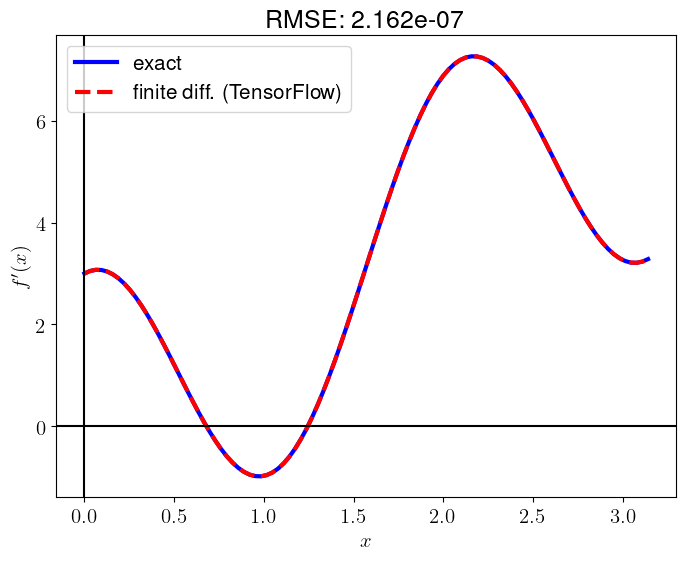

In [ ]:
#| warning: false
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

func = lambda x: x**2 + tf.math.sin(3*x)

x = tf.linspace(0.0, tf.constant(np.pi), 100)

# calculate derivatives of `f`
with tf.GradientTape() as tape:
    tape.watch(x)
    f = func(x)
    df_dx_tf = tape.gradient(f, x)

df_dx_tf = df_dx_tf.numpy()

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
x_numpy = x.numpy()
df_dx_exact = exact_d_func(x_numpy)
plt.plot(x_numpy, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x_numpy, df_dx_tf, 'r--', lw=3, label="finite diff. (TensorFlow)")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx_tf)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show();

In [ ]:
np.allclose(df_dx_exact, df_dx_tf)

True

### Implementation using `PyTorch`
> [PyTorch](https://pytorch.org/) is a Python package that provides two high-level features:
> - Tensor computation (like NumPy) with strong GPU acceleration
> - Deep neural networks built on a tape-based autograd system

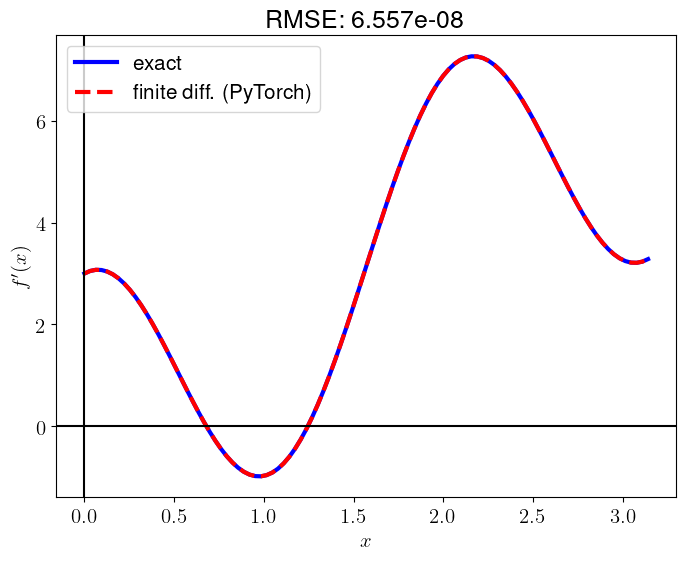

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

func = lambda x: x**2 + torch.sin(3*x)

x = torch.linspace(0, np.pi, 100)

# calculate derivatives of `f`
x.requires_grad = True
f = func(x)
df_dx_torch = torch.autograd.grad(f, x, grad_outputs=torch.ones_like(f), 
                            retain_graph=True, create_graph=True, allow_unused=True)[0]

df_dx_torch = df_dx_torch.detach().numpy()

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
x_numpy = x.detach().numpy()
df_dx_exact = exact_d_func(x_numpy)
plt.plot(x_numpy, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x_numpy, df_dx_torch, 'r--', lw=3, label="finite diff. (PyTorch)")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx_torch)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show()

In [ ]:
np.allclose(df_dx_exact, df_dx_torch)

True

### Implementation using `JAX`
> [JAX](https://github.com/google/jax) is [Autograd](https://github.com/hips/autograd) and [XLA](https://www.tensorflow.org/xla), brought together for high-performance numerical computing, including large-scale machine learning research.

CUDA backend failed to initialize: Found cuDNN version 8800, but JAX was built against version 8904, which is newer. The copy of cuDNN that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


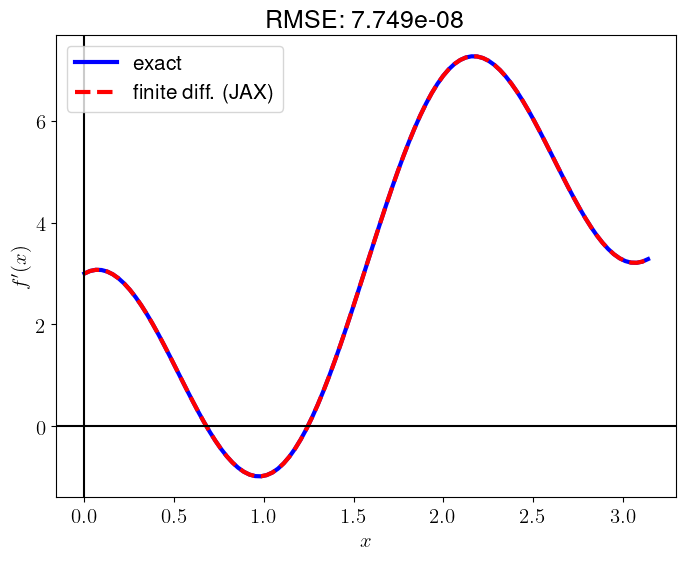

In [ ]:
#| warning: false
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax

func = lambda x: x**2 + jnp.sin(3*x)

x = jnp.linspace(0, jnp.pi, 100)

# calculate derivatives of `f`
df_dx_jax = jax.vmap(jax.grad(func))(x)

df_dx_jax = np.array(df_dx_jax)

# plot for comparison
exact_d_func = lambda x: 2*x + 3*np.cos(3*x)
x_numpy = np.array(x)
df_dx_exact = exact_d_func(x_numpy)
plt.plot(x_numpy, df_dx_exact, 'b-', lw=3, label="exact")
plt.plot(x_numpy, df_dx_jax, 'r--', lw=3, label="finite diff. (JAX)")
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f'(x)$")
RMSE = np.sqrt(np.mean((df_dx_exact - df_dx_jax)**2))
plt.title(f"RMSE: {RMSE:.3e}")
plt.legend()
plt.show()

In [ ]:
np.allclose(df_dx_exact, df_dx_jax)

True